1. Importing Necessary Packages

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import kozaipy as kp
from scipy.signal import find_peaks

2. Define General Constants

In [2]:
G = 6.67408*10**(-11)   # gravitational constant 
Mearth = 5.9722*10**24  # kg
Rearth = 6.371*10**6  # meters
Msun = 1.98911*10**30 # kg
Rsun = 6.95*10**8 # meters
Mjup = 1.898*10**27  # kg
Rjup = 7.1492*10**7 # meters
year = 365.25*24*60*60  # years in seconds
AU = (G*Msun*(year**2)/(4.*np.pi**2))**(1./3.)  # meters
c = 299792458 # m/s

3. Define planetary constants

In [3]:
# a1 = 10
# a2 = 1700
# e1 = 0.1
# P1 = 165/365.25
# P2 = 191.9036157029438
# m1 = 1.228 # host star
# m2 = 0.00591845 # planet
# m3 = 356*Mjup/Msun # binary star
# e2 = 0.5 # randomly selected
# k2 = 0.25
# R_p = 7.1492*1E7 # in meters
# k_qp = 0.3
# omega = 45.0 * np.pi/180
# a_present = 0.633
# e_present = 0.959

4. Eta Calculation Check

In [4]:
def Kozai_eta_GR(m1, m2, m3, a1, a2):
    m1 = m1*Msun
    m2 = m2*Msun
    m3 = m3*Msun
    a1 = a1*AU
    a2 = a2*AU
    m_tot = m1 + m2
    eta_GR = 3*G*(m_tot**2)*(a2**3)/(m3*(a1**4)*(c**2))
    return eta_GR

def Kozai_eta_GR_2(m1, m2, m3, a1, a2):
    m_tot_bar = m1 + m2
    m3_bar = m3
    a1_bar = a1
    a2_bar = a2/100
    eta_GR_2 = 0.03*(m_tot_bar**2)*(a2_bar**3)/(m3_bar*(a1_bar**4))
    return eta_GR_2
    
def Kozai_eta_Tide(m1, m2, m3, a1, a2, k2 ,R_p):
    m1 = m1*Msun
    m2 = m2*Msun
    m3 = m3*Msun
    a1 = a1*AU
    a2 = a2*AU
    m_tot = m1 + m2
    eta_tide = 15*k2*m1*m_tot*(a2**3)*(R_p**5)/(m3*m2*(a1**8))
    return eta_tide

def Kozai_eta_Tide_2(m1, m2, m3, a1, a2, R_p):
    m1_bar = m1
    m2_bar = m2*Msun/Mjup
    m3_bar = m3
    m_tot_bar = m1 + m2
    a1_bar = a1
    a2_bar = a2/100
    R_p_bar = R_p/Rjup
    eta_tide_2 = 1.47*1E-7*m1_bar*m_tot_bar*(a2_bar**3)*(R_p**5)/(m3_bar*m2_bar*(a1_bar**8))
    return eta_tide_2

def Kozai_eta_rot(m1, m2, m3, a1, a2, k_qp ,R_p, omega):
    m1 = m1*Msun
    m2 = m2*Msun
    m3 = m3*Msun
    a1 = a1*AU
    a2 = a2*AU
    m_tot = m1 + m2
    eta_rot = 3/2*k_qp*omega*m_tot/m3*((R_p/a1)**2)*((a2/a1)**3)
    return eta_rot 


def Kozai_eta_rot_2(m1, m2, m3, a1, a2, k_qp ,R_p, P_p):
    m1_bar = m1
    m2_bar = m2
    m3_bar = m3
    m_tot_bar = m1 + m2
    k_qp_bar = k_qp/0.17
    R_p_bar = R_p/Rjup
    a1_bar = a1
    a2_bar = a1/100
    eta_rot_2 = 8.48*10**(-4)*k_qp_bar*(P_p**(-2))*m_tot_bar*(R_p_bar**5)*(a2_bar**3)/(m2_bar*m3_bar*a1_bar**5)
    return eta_rot_2 

print('eta_GR: ' + str(Kozai_eta_GR(m1, m2, m3, a1, a2)))
print('eta_GR_2: ' + str(Kozai_eta_GR_2(m1, m2, m3, a1, a2)))
print('eta_tide: ' + str(Kozai_eta_Tide(m1, m2, m3, a1 , a2, k2, R_p)))
# print('eta_tide_2: ' + str(Kozai_eta_Tide_2(m1, m2, m3, a1, a2, R_p)))
print('eta_rotation: ' + str(Kozai_eta_rot(m1, m2, m3, a1, a2, k_qp, R_p, omega)))
print('eta_rotation_2: ' + str(Kozai_eta_rot(m1, m2, m3, a1, a2, k_qp, R_p, P1)))


NameError: name 'm1' is not defined

5. Timescale calculation

In [ ]:
# Timescale of GR precession
def t_GR_func(M0, M1, a1, e1):
    # M0, M1 in Solar masses
    # a1 in AU
    M0 = M0*Msun
    M1 = M1*Msun
    a1 = a1*AU
    t_GR = (2*pi*a1**(5./2)*c**2*(1-e1**2))/(3*G**(3./2)*(M0 + M1)**(3./2))
    return t_GR/year

# Timescale of KL oscillations in the quadrupole limit
def t_Quad_func(M0, M1, M2, P1, P2, e2):
    # M0, M1, M2 in Solar masses
    # P1, P2 in years
    M0 = M0*Msun
    M1 = M1*Msun
    M2 = M2*Msun
    P1 = P1*year
    P2 = P2*year
    t_Quad = (16/(30*pi))*((M0 + M1 + M2)/M2)*(P2**2/P1)*(1-e2**2)**(3./2)
    return t_Quad/year

# t_GR = t_GR_func(m1, m2, a1, e1) 
# t_Quad = t_Quad_func(m1, m2, m3, P1, P2, e2)
# print(t_GR, t_Quad)

6. Finding Decoupling Point Semi-Major Axis (Kozai-Lidov Oscillations turn off)

In [5]:
def Kozai_limit_func(m_1, m_2, m_3, a_2, e_1, e_2): # masses entered in Msun, a2 entered in AU
    
    G = 6.67408*10**(-11)   # gravitational constant 
    Mearth = 5.9722*10**24  # kg
    Rearth = 6.371*10**6  # meters
    Msun = 1.98911*10**30 # kg
    Rsun = 6.95*10**8 # meters
    Mjup = 1.898*10**27  # kg
    Rjup = 7.1492*10**7 # meters
    year = 365.25*24*60*60  # years in seconds
    AU = (G*Msun*(year**2)/(4.*np.pi**2))**(1./3.)  # meters
    c = 299792458 # m/s
    a_2 = a_2 * AU
    a_1 = (3*(a_2**3)*(1-e_2**2)**(3/2)*(m_1+m_2)**2*G/((1-e_1**2)*m_3*(c**2)))**(1/4)
    return a_1/AU

# print(Kozai_limit_func(m1*Msun, m2*Msun, m3*Msun, a2, e1, e2))

In [6]:
def millify(n):
    n = float(n)
    millnames = ['',' Thousand',' Million',' Billion',' Trillion']
    millidx = max(0,min(len(millnames)-1,
                        int(floor(0 if n == 0 else log10(abs(n))/3))))
    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

def annotation_line( ax, xmin, xmax, y, text, ytext=0, linecolor='black', linewidth=1, fontsize=12 ):

    ax.annotate('', xy=(xmin, y), xytext=(xmax, y), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|', 'color':linecolor, 'linewidth':linewidth})
    ax.annotate('', xy=(xmin, y), xytext=(xmax, y), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '<->', 'color':linecolor, 'linewidth':linewidth})

    xcenter = xmin + (xmax-xmin)/2
    if ytext==0:
        ytext = y + ( ax.get_ylim()[1] - ax.get_ylim()[0] ) / 20

    ax.annotate( text, xy=(xcenter,ytext), ha='center', va='center', fontsize=fontsize)

def draw_brace(ax, xspan, yy, text, font):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 300./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.05*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
    ax.plot(x, y, color='black', lw=1)

    ax.text((xmax+xmin)/2., yy+.07*yspan, text, ha='center', va='bottom', fontsize = font)

def find_slope(index, x_arr, y_arr):
    slope1 = abs(y_arr[i]-y_arr[i-1])/abs(x_arr[i]-x_arr[i-1])
    slope2 = abs(y_arr[i+1]-y_arr[i])/abs(x_arr[i+1]-x_arr[i])
    mean_slope= (slope1 + slope2)/2
    return mean_slope

def find_rate(index, x_arr,y_arr):
    mean_slope = find_slope(index,x_arr,y_arr)
    rate = y_arr[index]/mean_slope
    return rate


In [7]:
trip = kp.Triple(m0=1.24,m1=0.00474,m2=0.453,a1=10.0,a2=1664.0,e1=0.1,e2=0.5,I=85.07* np.pi/180.0, \
       g1=120,g2=360 * np.pi/180.0,\
       type0='star',type1='planet',\
       spinorbit_align0=False,\
       spinorbit_align1=True,\
       spin_rate0 = 2 * np.pi/20, spin_rate1 = 2 * np.pi/0.417,
       R0=1.392*kp.constants.Rsun,R1=1.186*Rjup/Rsun*kp.constants.Rsun,
       k2_0 = 0.014, k2_1=0.25, tv0=2.0e4, tv1=0.365242/32.5,rg_0=0.08,rg_1=0.25)





In [ ]:
sol = trip.integrate(timemin=0.0,timemax=3.4e10*365.25,Nevals=12000,\
       octupole_potential=True,\
       short_range_forces_conservative=True, \
       short_range_forces_dissipative=True)


## PLOT for e, I, a evolution

C:\Users\Haedam\AppData\Local\Temp\ipykernel_17468\4259469689.py:116: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=5.0)


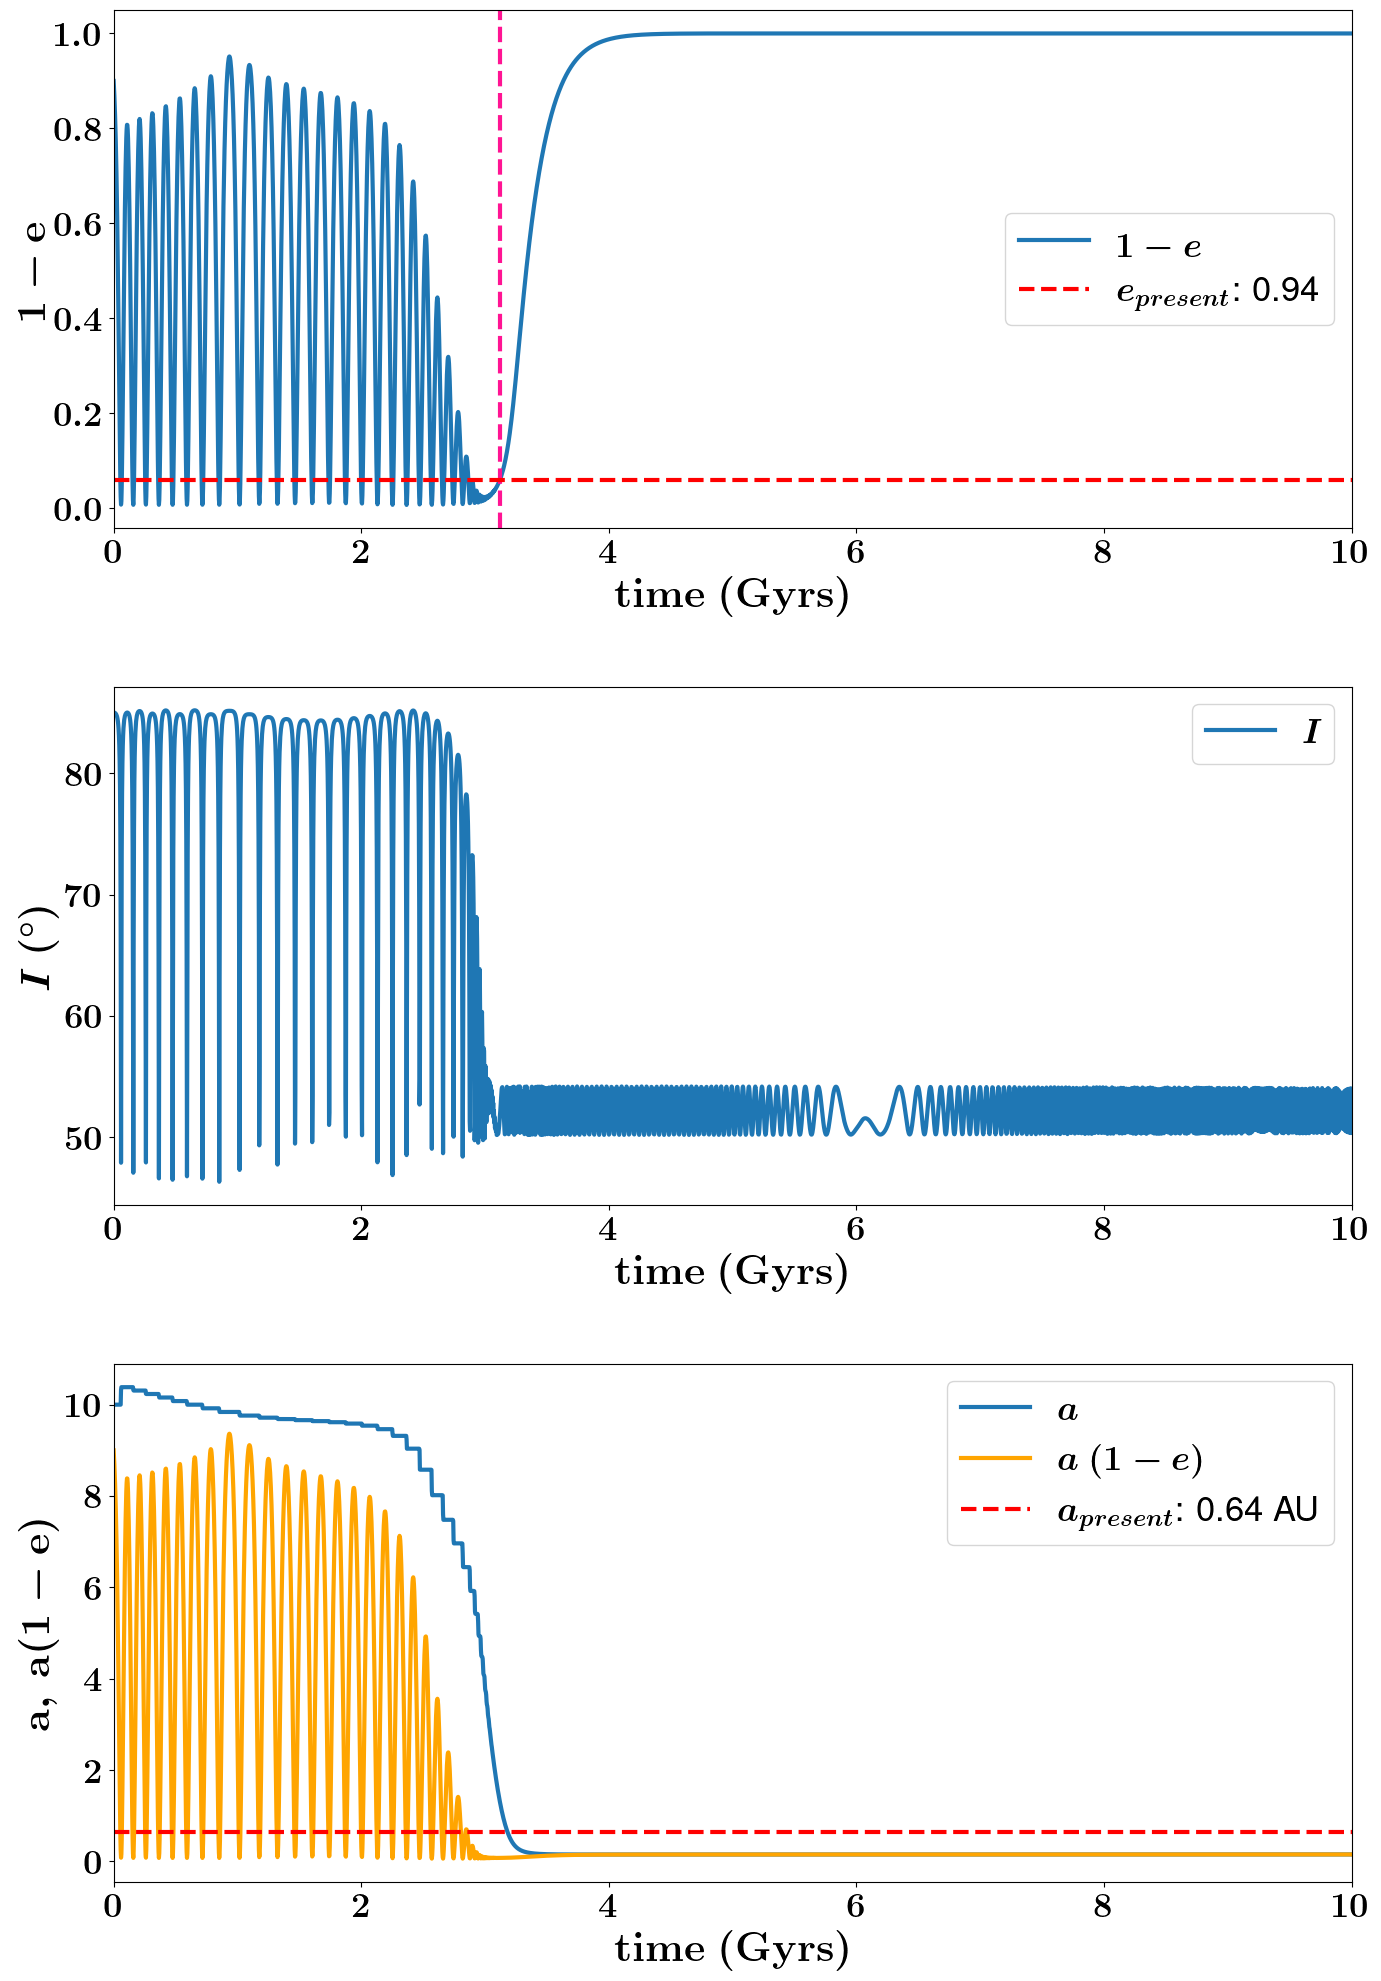

In [18]:
# import scienceplots

sol.to_elements()


time = sol.vectordata.time
incl1= sol.elementdata.I1
incl2 = sol.elementdata.I2
ecc1 = sol.elementdata.e1
a1 = sol.elementdata.a1




# plt.style.use('science')
# plt.rcParams['text.latex.preamble'] = r'\boldmath'
# print(time)
time_original = time.copy()
time_original_copy = time.copy()
# print(time_original)
time_new = [val/(10**9*365.25) for val in time_original]
# print(time_new)
time = time_new
# print(time)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

plt.rcParams['text.latex.preamble'] = r'\boldmath'

plt.rcParams["font.weight"] = "normal"

# plt.rcParams["axes.labelweight"] = "bold"

e_p = 0.94
a_p = 0.640

fig, axs = plt.subplots(3,1 , figsize=(15, 21))
index = 1101  

# axs[0].set_title('$1-e$ vs time', fontsize = 17)
axs[0].set_xlabel(r'$\bf time$' +" " +r'$\bf (Gyrs)$' ,fontsize = 30)
axs[0].set_ylabel(r"$\bf 1-e$", fontsize = 30)
axs[0].plot(time,1-ecc1, label = '$1-e$', linewidth = 3)

axs[0].axvline(time[index], linewidth=3, color='deeppink', linestyle = '--')


# axs[0].axvline(time[1195], linewidth=1, color='deeppink', linestyle = '--', label = "present time " + "(" + millify(time[index]) + " yrs" + ")")
axs[0].axhline(y = 1-e_p, color = 'r', linestyle = '--', label = '$e_{present}$: ' +  str(e_p) , linewidth = 3)
# axs[0].plot(time[1195], 1-e_p, marker="o", markersize=15,markerfacecolor="purple",  label = r'$\bf{present \: day}$')

# axs[0].plot(time[index], 1-ecc1[index], 'ro', label = r'$present \: day$')

# ann = 'present value: ' + '(' + f"{time[369]/365.25:.3}" + "yrs, "+ str(round(1-ecc1[369],2)) +')'
# axs[0].annotate(ann,  xy=(460, 750), xycoords='figure pixels')


# axs[1].set_title('I vs time', fontsize = 17)
axs[1].set_xlabel(r'$\bf time \: (Gyrs)$', fontsize = 30)
axs[1].set_ylabel("$I$ $($$^{\circ}$$)$", fontsize = 30)

axs[1].plot(time,incl1, label = '$I$', linewidth = 3)

# axs[1].axvline(time[1195], linewidth=3, color='deeppink', linestyle = '--')
# axs[1].axvline(time[index], linewidth=1, color='deeppink', linestyle = '--', label = "present time " + "(" + millify(time[index]) + " yrs" + ")")
# axs[1].axhline(y = 85.2, color = 'r', linestyle = '--', label = '$I_{present}$: ' + str(85.2) +" deg", linewidth = 1)
# axs[1].plot(time[1195], incl1[1195]+incl2[1195], 'ro', label = 'present day')

# axs[2].set_title("$a$ $a(1-e)$ vs time", fontsize = 17)
axs[2].set_xlabel(r'$\bf time$' +" " +r'$\bf (Gyrs)$', fontsize = 30)
axs[2].set_ylabel(r"$\bf a,  \: a(1-e)$", fontsize = 30)

axs[2].plot(time,a1, label= "$a$", linewidth = 3)
axs[2].plot(time,a1*(1-ecc1), label= "$a$ $(1-e)$", color = "orange", linewidth = 3)

# axs[2].axvline(time[1384], linewidth=3, color='deeppink', linestyle = '--')
# axs[2].axvline(time[1724], linewidth=3, color='deeppink', linestyle = '--', label = "present time " + "(" + millify(time[index]) + " yrs" + ")")
axs[2].axhline(a_p, color = 'red', linestyle = '--', label = '$a_{present}$: ' + str(a_p) + " AU" , linewidth = 3)
# axs[2].plot(time[1384], a_p, marker="o", markersize=15, markerfacecolor="purple", label = r'$\bf{present \: day}$')


# print("arr1_min: " + str())

# print("arr2: " + str(arr_e_I))
# print("arr2_min: " + str(arr_e_I_min))


# axs[0].text(10, 1-e_p,'present day = ' + str(0.06) + " AU")


fig.tight_layout()

# axs[3].set_title('subplot 4')
# axs[3].plot  (time/365.25,spin_period0)
# f2 = 1 + 7.5 * ecc1**2 + 5.625 * ecc1**4 + 0.3125 * ecc1**6
# f5 = 1 + 3.0 * ecc1**2 + 0.375 * ecc1**4
# orbital_period1= 2*np.pi/np.sqrt(kp.constants.G*(trip.m0+trip.m1)/a1**3)
# spin_period1_ps =  orbital_period1/(f2/f5/(1-ecc1**2)**1.5)
# ax.plot(time/365.25,spin_period1)
# ax.plot(time/365.25,orbital_period1,'k--')
# ax.set_xlabel('time[yr]',size=20)
# ax.set_ylabel('spin period',size=20)
# ax.set_yscale('log')
# ax.set_ylim(0,25)

for i in range (0,3):
    axs[i].legend(loc='best', fontsize = 25)
#     axs[i].grid(axis="x")
    axs[i].tick_params(axis='both', labelsize= 25)
    axs[i].set_xlim(0,10)
    axs[i].xaxis.offsetText.set_fontsize(25)

fig.tight_layout(pad=5.0)
fig.subplots_adjust()
plt.show()


In [21]:
# To find the index corresponding to 0.94
for i in range(0, len(ecc1)):
    if abs(ecc1[i] - 0.94) < 10**(-1.):
        print(i, ecc1[i])

18 0.8907304239627353
19 0.9406192937147712
20 0.9755465922605058
21 0.991931729290491
22 0.9846422420236706
23 0.9546531698094664
24 0.9062109287224067
25 0.8441315663037982
52 0.8423200969947637
53 0.9037878825186006
54 0.9522264230468487
55 0.9830889099142351
56 0.992310088207979
57 0.9781173871002518
58 0.9435676018837911
59 0.8926660201075124
88 0.8474798332423601
89 0.9083291591105946
90 0.95568551063855
91 0.9849091650270079
92 0.9918711107267476
93 0.9753853394880322
94 0.9388158206895072
95 0.8862943683154643
126 0.8973106506799068
127 0.9466154681258487
128 0.9796030419313027
129 0.9923431976585921
130 0.9823210767616425
131 0.952005931435661
132 0.9051597095409943
133 0.8459844907260248
165 0.896636854255848
166 0.9460726479852158
167 0.9792796227984552
168 0.9922804234362878
169 0.9825867783955318
170 0.9527318783313063
171 0.9064506436703708
172 0.8478917201636125
206 0.8978569404491972
207 0.9461786907317417
208 0.9788703351535923
209 0.9921616217954105
210 0.983424305437

## PLOT for Stellar-spin misalignment

0.3119759979998333 109.80956391530987


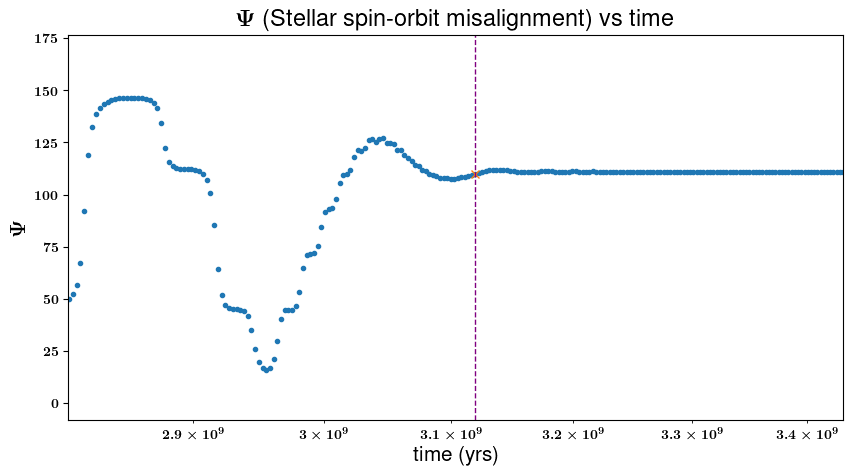

In [20]:

index = 1101   

# print(time)

time =  time_original/365.25
 

Omega0x = np.array(sol.elementdata.Omega0x)
Omega0y = np.array(sol.elementdata.Omega0y)
Omega0z = np.array(sol.elementdata.Omega0z)
I1= np.array(sol.elementdata.I1)
I2 = np.array(sol.elementdata.I2)
node1= np.array(sol.elementdata.h1)
node2= np.array(sol.elementdata.h2)
psi_arr = []

for i in range(0,len(node1)):
    
    Omega0_vec = np.array([Omega0x[i], Omega0y[i], Omega0z[i]])
    n1_vec = np.array([sin(node1[i]*pi/180)*sin(I1[i]*pi/180), -cos(node1[i]*pi/180)*sin(I1[i]*pi/180), cos(I1[i]*pi/180)])
    n2_vec = np.array([sin(node2[i]*pi/180)*sin(I2[i]*pi/180), -cos(node2[i]*pi/180)*sin(I2[i]*pi/180), cos(I2[i]*pi/180)])
    mut_inc = np.arccos(np.sum(n1_vec*n2_vec, axis = 0))*(180/pi)
    spin0_vec = Omega0_vec/np.sqrt(np.sum(Omega0_vec**2, axis = 0))
    Psi = np.arccos(np.sum(n1_vec*spin0_vec, axis = 0))*180/pi
#     print(Psi)
    psi_arr.append(Psi)

# print(psi_arr)



fig1, plot3 = plt.subplots(1,1 , figsize=(10,5))
# fig.suptitle('TIC 241249530', fontsize = 17)

plot3.semilogx(time, psi_arr, ".", label = r'$\Psi$')

print(time[index]/1E10, psi_arr[index])

plot3.semilogx(time[index], psi_arr[index], "x" )
plot3.set_title(r'$\Psi$' + " "+ r"(Stellar spin-orbit misalignment) vs time", fontsize = 17)
plot3.set_xlabel("time (yrs)" ,fontsize = 15)
plot3.set_ylabel(r'$\Psi$', fontsize = 15)
plot3.axvline(time[index], linewidth=1, color='purple', linestyle = '--', label = "estimated age")
plot3.set_xlim(time[index]*0.9, time[index]*1.1)

# plot3.set_xlim(10**10)



# plot2.axvline(time[index]/365.25, linewidth=1, color='deeppink', linestyle = '--', label = "present time " + "(" + millify(time[index]) + " yrs" + ")")
# axs[0].axhline(y = 0.06, color = 'r', linestyle = '--', label = 'present $e$ ' + "(" + str(e_p) + ")", linewidth = 1)
# axs[0].semilogx(time[index]/365.25, Omega0[index], 'ro', label = 'present day')
fig.subplots_adjust(top=0.95)
plt.show()

# n1_vec = np.array([sin(node1*pi/180)*sin(I1*pi/180), -cos(node1*pi/180)*sin(I1*pi/180), cos(I1*pi/180)])
# n2_vec = np.array([sin(node2*pi/180)*sin(I2*pi/180), -cos(node2*pi/180)*sin(I2*pi/180), cos(I2*pi/180)])
# mut_inc = np.arccos(np.sum(n1_vec*n2_vec, axis = 0))*(180/pi)
# Omega0_vec = np.array([Omega0x, Omega0y, Omega0z])
# spin0_vec = Omega0_vec/np.sqrt(np.sum(Omega0_vec**2, axis = 0))
# Psi = np.arccos(np.sum(n1_vec*spin0_vec, axis = 0))

In [ ]:
# To export a list of time and other values
import csv
from itertools import zip_longest
d = [time, a1, a1*(1-ecc1)]
export_data = zip_longest(*d, fillvalue = '')
with open('graph 2 subfig 3.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("time", "a", "a(1-e)"))
      wr.writerows(export_data)
myfile.close()


(0, 10)

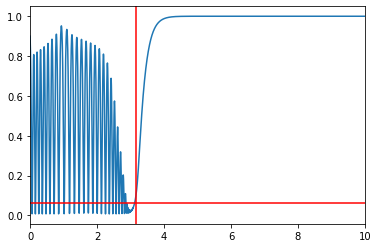

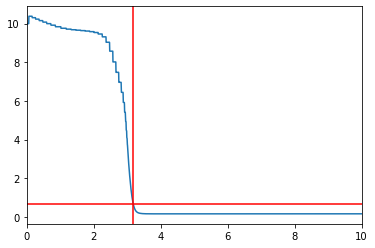

In [27]:
sim_data = np.genfromtxt('ZLK_simulations_time_series_data_v2.csv', delimiter = ',')
time, one_minus_e, I, a, periapse_dist = sim_data.T

plt.plot(time, one_minus_e)
plt.axhline(1-0.94, color = 'r')
plt.axvline(time[1120], color = 'r')
plt.xlim(0, 10)


plt.figure()
plt.plot(time, a)
plt.axhline(0.64, color = 'r')
plt.axvline(time[1120], color = 'r')
plt.xlim(0, 10)

In [35]:
a[1101]

1.308675711

In [26]:
min(a)

0.14904845

In [14]:
print (np.argmin(np.abs(1-one_minus_e - 0.94)))

print (np.argmin(np.abs(a - 0.64)))

1101
1123


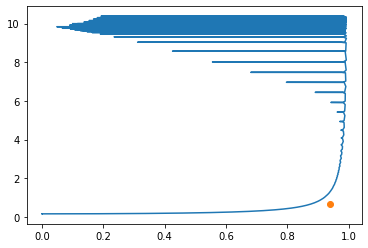

In [18]:
plt.plot(1-one_minus_e, a)
plt.plot(0.94, 0.64, 'o')

In [11]:
a[1101]

1.308675711